In [ ]:
%pylab inline
import pandas as pd
from scipy import linalg
from itertools import combinations
import matplotlib.pyplot as plt
import scipy
import scipy.io as io
import scipy.sparse as sparse
import numpy as np
import statistics as stats
from sklearn import model_selection

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['linalg', 'rand']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


$\def\m#1{\mathbf{#1}}$
$\def\mm#1{\boldsymbol{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$
$\def\mr#1{\mathrm{#1}}$
$\newenvironment{rmat}{\left[\begin{array}{rrrrrrrrrrrrr}}{\end{array}\right]}$
$\newcommand\brm{\begin{rmat}}$
$\newcommand\erm{\end{rmat}}$
$\newenvironment{cmat}{\left[\begin{array}{ccccccccc}}{\end{array}\right]}$
$\newcommand\bcm{\begin{cmat}}$
$\newcommand\ecm{\end{cmat}}$


# Homework 2
## Homework guideline

- This is a group homework. Your group only needs to submit one homework. You can form a group of 1, 2 or 3.


- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point.

- Please justify all short answers with a brief explanation.

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to.

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources. But you
must understand, write, and hand in your own answers. In addition, you must write and submit
your own code in the programming part of the assignment (we may run your code).
If you copy someone else homework solution, both of you may receive ZERO point.

- **Late assignments:** Recognizing that students may face unusual circumstances and require some flexibility in the course of the semester, each student will have a total of 7 free late (calendar) days to use as s/he sees fit, but no more than 4 late days can be used on any single assignment. Late days are counted at the granularity of days: e.g., 3 hours late is one late day.  

- **You must write your own code and fill in the your answer in the text box.** If you fail to do either of that, you will receive zero point.


**Your Group Member:**

I had intended to collaborate with two others, but I did everything on my own anyways. I shared some of my material with them (1, 3.1, and 3.3), of which it seemed they already had answers, and they shared part of their code for 2.1, but I didn't copy their code.

I'm not sure what both of their names are, but one is Yuhao Wang.

# Q1: Bias-Variance trade-off (20pt)
Let $\mm\theta\in\mb{R}^n$ be the unknown true means of our $n$ Gaussian distributions,i.e., we get a vector $\m{X}$ where each $\m{X}_i\sim \c{N}(\theta_i, \sigma^2), i=1,\dots, n$. We assume every Gaussian distribution has the same variance and is independent, but means can be different. Our job is to find the estimator $\hat{\mm\theta}$ to minimize the expected error $\mb{E}[\|\hat{\mm\theta}-\mm\theta\|_2^2]$.  All expectations are taken with respect to the random draws of the $\m{X}_i$ random variables.



---



## Q1.1 Derivation (5pt)
**Show** the Bias-Variance trade-off formula for the estimator
\begin{align}
\mb{E}[\|\hat{\mm\theta}-\mm\theta\|_2^2] = \mb{V}[\hat{\mm\theta}]+\text{bias}^2[\hat{\mm\theta}]
\end{align}
where $\mb{V}[\hat{\mm\theta}] = \mb{E}[\|\hat{\mm\theta} -\mb{E}[\hat{\mm\theta}]\|_2^2]$ and $\text{bias}^2[\hat{\mm\theta}] = \|\mb{E}[\hat{\mm\theta}-\mm\theta]\|_2^2$

# Your Solution:

Note: $\mb{V}[\hat{\mm\theta}] = \mb{E}[(\hat{\mm\theta})^2] -\mb{E}[\hat{\mm\theta}]^2 \Rightarrow \mb{V}[\hat{\mm\theta}] +\mb{E}[\hat{\mm\theta}]^2 = \mb{E}[(\hat{\mm\theta})^2]$.

Then:

$$
\begin{align*}
\mb{E}[\|\hat{\mm\theta}-\mm\theta\|_2^2] &= \mb{E}[(\hat{\mm\theta})^2 + \mm\theta^2 - 2\hat{\mm\theta} · \mm\theta]\\
&= \mb{E}[(\hat{\mm\theta})^2] + \mb{E}[\mm\theta^2] - \mb{E}[2\hat{\mm\theta} ·\mm\theta]\\
&= \mb{V}[\hat{\mm\theta}] + \mb{E}[\hat{\mm\theta}]^2 - 2\mm\theta\mb{E}[\hat{\mm\theta} ] + \mm\theta^2 \\
&= \mb{V}[\hat{\mm\theta}] + (\mb{E}[\hat{\mm\theta}] - \mm\theta)^2\\
&= \mb{V}[\hat{\mm\theta}]+\text{bias}^2(\hat{\mm\theta})
\end{align*}
$$



---


If we only observe one data, which is just $\m{X}$. Of course, the most natural choice of the estimator is $\hat{\mm\theta}=\m{X}$.

---


## Q1.2 $\text{Bias}^2$ and Variance for natural estimator (5pt)
What is the $\text{Bias}^2$ and variance of the natural estimator $\hat{\mm\theta}=\m{X}$?


# Your Solution:

$$
\begin{align*}
\text{bias}^2(\m{X}) &= (\mb{E}[\m{X}] - \theta)^2\\
&= (\theta - \theta)\\
&= 0,\\
\\
\mb{V}[\m{X}] &= \sigma^2
\end{align*}
$$



---

Let's try a different estimator, shrinkage estimator, $\hat{\mm\theta}=\frac{9}{10}\m{X}$

---


## Q1.3 $\text{Bias}^2$ and Variance for shrinkage estimator (5pt)
What is the $\text{Bias}^2$ and variance of the shrinkage estimator $\hat{\mm\theta}=\frac{9}{10}\m{X}$?


# Your Solution:

$$
\begin{align*}
\text{bias}^2(\frac{9}{10}\m{X}) &= (\mb{E}[\frac{9}{10}\m{X}] - \theta)^2\\
&= (\frac{9}{10}\mb{E}[\m{X}] - \theta)^2\\
&= (\frac{9}{10}\theta - \theta)^2\\
&= ( - \frac{1}{10}\theta)^2\\
&= \frac{1}{100}\theta^2,\\
\\
\mb{V}[\frac{9}{10}\m{X}] &= \frac{81}{100}\mb{V}[\m{X}]\\
&= \frac{81}{100}\sigma^2
\end{align*}
$$



---


## Q1.4 Which one is better? (5pt)
Suppose you know that the variance of our samples is quite a bit. Specifically assume $\sigma^2>\frac{1}{10}\theta_i^2$ for all $i$. Which estimator is better?

# Your Solution:

With a much larger change occuring to the variance w.r.t the shrinkage estimator v.s. the bias, we claim that for higher variances, it would be better to help reduce the variance with a slight increase to the bias, as high variance tends to be worse for models than a slight bias. As is the case for the "trade-off" we are studying, there will be a happy medium in which our model will be better off with an increase to the bias if the variance is high, especially in the case above where our variance is bounded below w.r.t the mean.



---



---



# Q2: Kernelized Regression (30pt)

 This problem will get you familiar with kernel ridge regression using the polynomial and RBF kernels.
 First, let's generate some data. Let $n=30$ and $f_*(x) = 4 \sin(\pi x)\cos(6\pi x^2)$.
For $i=1,\dots,n$ let each $x_i$ be drawn uniformly at random from $[0,1]$, and let $y_i = f_*(x_i) + \epsilon_i$ where $\epsilon_i \sim \mathcal{N}(0,1)$.
For any function $f$, the true error and the train error are respectively defined as:
$$\mathcal{E}_{\rm true}(f) = \mathbb{E}_{X,Y}\left[(f(X) - Y)^2\right], \quad \quad  \widehat{\mathcal{E}}_{\rm train}(f) =  \frac{1}{n} \sum_{i=1}^n \left(f(x_i)-y_i\right)^2.$$
Now, our goal is, using kernel ridge regression, to construct a predictor:
$$\widehat{\alpha} = \arg\min_\alpha \|K\alpha - y\|_2^2 + \lambda \alpha^\top K \alpha \ , \quad \quad \widehat{f}(x) = \sum_{i=1}^n \widehat{\alpha}_i k(x_i,x)$$
where $K\in\mathbb{R}^{n\times n}$ is the kernel matrix such that $K_{i,j} = k(x_i,x_j)$, and $\lambda\geq 0$ is the regularization constant.



---

## Q2.1: Find parameters for kernels (20pt)
Using leave-one-out cross validation, find a good $\lambda$ and hyperparameter settings for the following kernels:

- $k_{\rm poly}(x,z) = (1+x^\top z)^d$ where $d \in \mathbb{N}$ is a hyperparameter,
- $k_{\rm rbf}(x,z) = \exp(-\gamma \|x-z\|_2^2)$ where $\gamma > 0$ is a hyperparameter. Given a dataset $x_1,\dots,x_n \in \mathbb{R}^d$, a heuristic for choosing a range of $\gamma$ in the right ballpark is the inverse of the median of all $\binom{n}{2}$ squared distances $\|x_i-x_j\|^2$.


We strongly recommend implementing either [grid search](https://en.wikipedia.org/wiki/Hyperparameter_optimization#Grid_search)
or [random search](https://en.wikipedia.org/wiki/Hyperparameter_optimization#Random_search).
**Do not use sklearn**, but actually implement of these algorithms. Reasonable values to look through in this problem are: $\lambda \in 10^{[-5, -1]}$ and $d \in [5, 25]$. You do **not** need to search over $\gamma$ (you can use the heuristic), but if you would like to, a reasonable place to start would be to sample from a narrow gaussian distribution centered at the value described above.

Report the values of $d$, $\lambda$, and $\gamma$ for both kernels.

In [ ]:
def get_data(n):
    # returns a numpy array of size (n,) where each element is from unif(0,1)
    return np.random.uniform(0, 1, (n,))

def get_errors(n):
    # returns a numpy array of size (n,) where each element is from norm(0,1)
    return np.random.normal(0, 1, (n,))

def f_star(x):
    # returns the "transformed" array based on the function f* given above
    return np.dot(4*np.sin(np.pi*x), np.cos(6*np.pi*(x**2)))

def gamma_heuristic(x):
    n = len(x)
    values = []
    for i in range(n):
        for j in range(i+1,n):
            values.append( (x[i]-x[j])**2 )
    return stats.median(values)[0]

def kernel_regression(k, y, lam):
    # returns optimal alpha
    n = len(k)
    return np.dot(np.linalg.inv(k+lam*np.eye(n)),y)

def kernel_poly(x,z,d):
    # returns rbf kernel K
    m = len(x)
    n = len(z)
    K = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            K[i,j] = (np.dot(x[i],z[j]) + 1)**d
    return K

def kernel_rbf(x,z,gam):
    # returns rbf kernel K
    m = len(x)
    n = len(z)
    K = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            K[i,j] = np.exp(-(gam*linalg.norm(x[i]-z[j])**2))
    return K

def pred_poly(x,z,d,alpha):
    # returns predictions y for poly
    ktest = kernel_poly(x,z,d)
    return np.dot(alpha,ktest)[0]

def pred_rbf(x,z,gam,alpha):
    # returns predictions y for rbf
    ktest = kernel_poly(x,z,gam)
    return np.dot(alpha,ktest)

def loo_mse(y_hat, y):
    sum = 0
    for i in range(len(y_hat)):
        sum += (y_hat[i]-y[i])**2
    return sum/n

def leaveoneout_poly(x,y,lam,d, get_f=False):
    # returns the average mse of leave-one-out rbf kernelized regression of x, y using hyperparameters lambda and gamma
    n = len(x)
    pred_list = []
    for i in range(n):
        xtr = np.delete(x, i)
        xte = x[i].reshape((1,1))
        ytr = np.delete(y, i)
        yte = y[i]
        K = kernel_poly(xtr,xtr,d)
        alpha = kernel_regression(K,ytr,lam)
        y_pred = pred_poly(xtr,xte,d,alpha)
        pred_list.append(y_pred)
    if get_f:
        return pred_list
    else:
        return loo_mse(pred_list, y)[0]

def leaveoneout_rbf(x,y,lam,gam,get_f=False):
    # returns the average mse of leave-one-out rbf kernelized regression of x, y using hyperparameters lambda and gamma
    n = len(x)
    pred_list=[]
    for i in range(n):
        xtr = np.delete(x, i)
        xte = x[i].reshape((1,1))
        ytr = np.delete(y, i)
        yte = y[i]
        K = kernel_rbf(xtr,xtr,gam)
        alpha = kernel_regression(K,ytr,lam)
        y_pred = pred_rbf(xtr,xte,gam,alpha)
        pred_list.append(y_pred)
    if get_f:
        return pred_list
    else:
        return loo_mse(pred_list, y)[0]

def grid_search(x,y,kernel_type, d_range_min = 5, d_range_max = 25, log_lam_range_min = -5,
                log_lam_range_max = -1, search_range = 10):

    # for kernel_type == "rbf", returns a list of [minimum error, lambda, gamma] for LOOCV rbf kernelized regression
    # for kernel_type == "poly", returns a list of [minimum error, lambda, d] for LOOCV polynomial kernelized regression

    lams = np.logspace(log_lam_range_min, log_lam_range_max, search_range)  # lambda parameter grid

    if kernel_type == "rbf":
        # solve for heuristic
        gam_heur = gamma_heuristic(x)
        gams = np.linspace(gam_heur-1, gam_heur+1, search_range)
        min_error = np.infty
        for lam in lams:
            for gam in gams:

                temp_error = leaveoneout_rbf(x,y,lam,gam)

                if temp_error < min_error:
                    min_error = temp_error
                    best_lam = lam
                    best_gam = gam

        return [min_error, best_lam, best_gam]

    elif kernel_type == "poly":
        ds = np.linspace(d_range_min, d_range_max, search_range)  # d parameter grid
        min_error = np.infty
        for lam in lams:
            for d in ds:
                temp_error = leaveoneout_poly(x,y,lam,d)

                if temp_error < min_error:
                    min_error = temp_error
                    best_lam = lam
                    best_d = d

        return [min_error, best_lam, best_d]


    else:
        raise NotImplementedError




In [ ]:
data_size = 30
x = get_data(data_size)
error = get_errors(data_size)
y = f_star(x) + error


In [ ]:
import time

start_time = time.time()

poly_sim = grid_search(x,y,'poly')
rbf_sim = grid_search(x,y,'rbf')

print("Grid Search algorithm for Polynomial Kernel: min error =", poly_sim[0], ", best lambda =", poly_sim[1], ", best d =", poly_sim[2])
print(" ")
print("Grid Search algorithm for RBF Kernel: min error =", rbf_sim[0], ", best lambda =", rbf_sim[1], ", best gamma =", rbf_sim[2])
print("total time: ", time.time() - start_time)


<ipython-input-197-be915dc6fbaf>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  K[i,j] = (np.dot(x[i],z[j]) + 1)**d
<ipython-input-197-be915dc6fbaf>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  K[i,j] = np.exp(-(gam*linalg.norm(x[i]-z[j])**2))


Random Search algorithm for Polynomial Kernel: min error = 0.908861434129281 , best lambda = 0.0005994842503189409 , best d = 11.666666666666668
 
Random Search algorithm for Polynomial Kernel: min error = 1.0369987754211702 , best lambda = 0.1 , best gamma = [0.18496347]
total time:  88.27164220809937



# Your Solution:

After running the grid search a handful of times with different random sets of data, the output seemed to agree to show that $d \in [10,12], \lambda \in [.0001, .001]$.

The gamma heuristic was used to make a range to search through, where typically our output was $\gamma \in [.1,.2]$, depending on the data generated. We elect to use the heuristic for the below testing.



---

# Q2.2: Plot functions (10pt)
 Let $\widehat{f}_{\rm poly}(x)$ and $\widehat{f}_{\rm rbf}(x)$ be the functions learned using the hyperparameters you found in Q2.1.
For a single plot per function $\widehat{f} \in \left\lbrace \widehat{f}_{\rm poly}(x), \widehat{f}_{\rm rbf}(x) \right\rbrace$, plot the original data $\{(x_i,y_i)\}_{i=1}^n$, the true $f(x)$, and $\widehat{f}(x)$ (i.e., define a fine grid on $[0,1]$ to plot the functions). Make Two plots. One plot for each function.


<ipython-input-199-1ba6d74db2bb>:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  K[i,j] = (np.dot(x[i],z[j]) + 1)**d


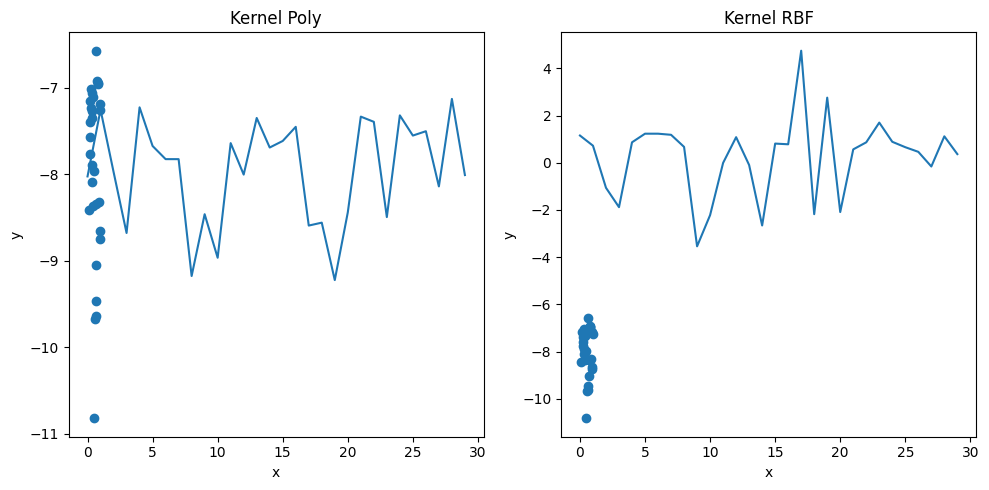

In [ ]:
# using the output from the data generated above:

best_lam_poly = .0005
best_d = 11
best_lamb_rbf = .1
best_gam = gamma_heuristic(x)

f_poly = leaveoneout_poly(x,y,best_lam_poly,best_d,True)

f_rbf = leaveoneout_rbf(x,y,best_lam_rbf,best_gam,True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(x, y)
ax1.plot(f_poly)
ax1.set_title('Kernel Poly')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax2.scatter(x, y)
ax2.plot(f_rbf)
ax2.set_title('Kernel RBF')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()

plt.show()



---



---


# Q3: Random Fourier Features (50pt)
This question is going to answer why Homework 1 Q2.4 works so well.

Kernel methods such as Logistic Regression are considered memory-based learners. Rather than learning a mapping from a set of input features $\mathcal{X} \subset \mathbb{R}^d$ to outputs in $\mathcal{Y}$, they remember all training examples $(\mathbf{x_i}, y_i)$ and learn a corresponding weight for them.

\begin{align*}
    \hat{f}(\mathbf{x}) = \sum_{i=1}^N \omega_i k(\mathbf{x_i}, \mathbf{x})
\end{align*}

After learning the weight vector $\mathbf{w} = [\mathbf{w}_1, ..., \mathbf{w}_N]$, we can make prediction on unseen samples using the **kernel function** $k$ between all training samples and $\mathbf{x}$. Kernel methods are attractive because they rely on the \textit{kernel trick}. Any positive definite function $k(\mathbf{x}, \mathbf{x}')$ with $\mathbf{x}, \mathbf{x}' \in \mathbb{R}^d$ defines a function $\psi$ mapping $\mathbb{R}^d$ to a higher-dimensional space such that the inner product between datapoints can be quickly computed as $\langle \psi(\mathbf{x}), \psi(\mathbf{x}') \rangle = k(\mathbf{x}, \mathbf{x}')$. In essence, the kernel trick is an efficient way to learn a linear decision boundary in a higher dimension space than that of $\mathcal{X}$.

The kernel trick can be prohibitively expensive for large datasets. This is because the memory-based algorithm accesses the data through evaluations of the kernel matrix $k(x, x')$ which grows in proportion to the dataset size $N$.

Instead of relying on the implicit feature mapping $\psi$ provided by the kernel trick, suppose we can approximate the kernel function $k$ as the inner product of two vectors in $\mathbb{R}^D$. Mathematically, we would like to find a mapping $\mathbf{z}$.

\begin{align*}
    \mathbf{z} : \mathbb{R}^d \rightarrow \mathbb{R}^D \qquad \text{such that} \qquad k_p(\mathbf{x}, \mathbf{x}') = \langle \psi(\mathbf{x}), \psi(\mathbf{x}') \rangle \approx \langle \mathbf{z}(\mathbf{x}), \mathbf{z}(\mathbf{x}') \rangle
\end{align*}

With this approximation, we no longer require the kernel trick to express $\langle \psi(\mathbf{x}), \psi(\mathbf{x}')\rangle$ as $k(\mathbf{x}, \mathbf{x}')$. Rather, we can approximate it by directly computing the tractable inner product $\langle \mathbf{z}(\mathbf{x}), \mathbf{z}(\mathbf{x}')\rangle$.
\begin{align*}
    \hat{f}(\mathbf{x}) = \sum_{i=1}^N \mathbf{\omega}_i k(\mathbf{x}_i, \mathbf{x}) = \sum_{i=1}^N \mathbf{\omega}_i  \langle \psi(\mathbf{x}_i), \psi(\mathbf{x}) \rangle \approx  \sum_{i=1}^N \mathbf{\omega}_i \langle \mathbf{z}(\mathbf{x}), \mathbf{z}(\mathbf{x})\rangle = \left(\sum_{i=1}^N \mathbf{\omega}_i \mathbf{z}(\mathbf{x}_i)^T \right) \mathbf{z}(\mathbf{x}) = \beta^T \mathbf{z}(\mathbf{x})
\end{align*}

Assuming $\mathbf{z}(\mathbf{x}) = \sigma(M \mathbf{x} + b)$ for some nonlinear function $\sigma$, this ``approximate'' Logistic Regression can potentially be evaluated much quicker than the kernel Logistic Regression.
To see why, note that the left-hand-side requires evaluating $k(\mathbf{x_i}, \mathbf{x})$ for all $i \in \{1,\dots,N\}$, in general, if $\omega_i$ is not sparse.
On the other hand, the right-hand-side just requires computing $\mathbf{z}(\mathbf{x})=\sigma(M \mathbf{x} + b)$ which is dominated by the time to compute a $D \times d$ matrix-vector product, and then inner product with $\beta$ which is $\mathbb{R}^D$.
Thus, the total computation time for the left-hand-side scales linearly with $N$, and the right-hand-side scales with just $d$ and $D$, independent of $N$!

When training the approximate Logistic Regression we also get similar computational savings if $N \gg \max\{d,D\}$.


---

## Q3.1: Deriving Random Fourier Features
Bochner's theorem states that a continuous kernel $k(\mathbf{x}, \mathbf{x}') = k(\mathbf{x}-\mathbf{x}')$ on $\mathbb{R}^d$ is positive definite if and only if $k$ is the Fourier transform of a non-negative measure. While we won't delve into the logic of Fourier transforms here, this theorem lets us express the kernel as follows: for any probability distribution $p(\mathbf{w})$ define
\begin{align*}
    k_p(\mathbf{x}, \mathbf{x}') := \int_{\mathbb{R}^d} p(\mathbf{w}) e^{i\mathbf{w}^T (\mathbf{x}-\mathbf{x}')}dw = \mathbb{E}_{\mathbf{w}} \left[e^{i\mathbf{w}^T (\mathbf{x}-\mathbf{x}')}\right]
\end{align*}
where $i = \sqrt{-1}$, the imaginary unit. While any choice of $p(\mathbf{w})$ induces a valid kernel, in this problem we'll be focusing on the Gaussian distribution, namely
\begin{align*}
    p(\mathbf{w}) = (2\pi\sigma^2)^{-\frac{D}{2}}e^{-\frac{1}{2 \sigma^2} \vert\vert \mathbf{w} \vert\vert ^2_2} = (2\pi/\gamma^2)^{-\frac{D}{2}}e^{-\gamma^2 \vert\vert \mathbf{w} \vert\vert ^2_2/2} \quad \text{where} \ \gamma = \frac{1}{\sigma}
\end{align*}
We'll use this Fourier-transform interpretation of $k$ to derive a randomized mapping $\mathbf{z}: \mathbb{R}^d \rightarrow \mathbb{R}^D$ which is an unbiased estimate of the kernel function i.e.
\begin{align*}
            \mathbb{E}_{\mathbf{w}}[\mathbf{z}(\mathbf{x})^T \mathbf{z}(\mathbf{x}')] = k_p(\mathbf{x}, \mathbf{x}')
\end{align*}
If $\mathbf{z}(x)^T \mathbf{z}(x')$ serves as a good approximation to the kernel matrix, we can apply the aforementioned approximation algorithm.


---


### Q3.1.1 Step 1 (5pt)
Use Euler's formula $e^{iy} = \cos(y) + i \sin(y)$ to show that $k_p(\mathbf{x}, \mathbf{x}') = E_{\mathbf{w}} \left[\cos(\mathbf{w}^T(\mathbf{x}-\mathbf{x}')) \right]$.

**Hint:** If both $x$ and $A$ are real, then $A = \int f(x) + ig(x) dx = \int f(x) dx $.



# Your Solution:

$$
\begin{align*}
k_p(\mathbf{x}, \mathbf{x}') &= \int_{\mathbb{R}^d} p(\mathbf{w}) e^{i\mathbf{w}^T (\mathbf{x}-\mathbf{x}')}dw\\
&= \int_{\mathbb{R}^d} p(\mathbf{w}) \left[ \cos(\mathbf{w}^T (\mathbf{x}-\mathbf{x}')) + i\sin(\mathbf{w}^T (\mathbf{x}-\mathbf{x}')) \right] dw\\
&= \int_{\mathbb{R}^d} p(\mathbf{w})\cos(\mathbf{w}^T (\mathbf{x}-\mathbf{x}')) + i p(\mathbf{w})\sin(\mathbf{w}^T (\mathbf{x}-\mathbf{x}')) dw\\
&= \int_{\mathbb{R}^d} p(\mathbf{w})\cos(\mathbf{w}^T (\mathbf{x}-\mathbf{x}')) dw\\
&= E_{\mathbf{w}} \left[\cos(\mathbf{w}^T(\mathbf{x}-\mathbf{x}')) \right]
\end{align*}
$$



---


### Q3.1.2: Step 2 (10pt)
We begin by defining $z_{\mathbf{w}} : \mathbb{R}^d \rightarrow \mathbb{R}$ as
\begin{align*}
    z_{\mathbf{w}}(\textbf{x}) &= \sqrt{2} \cos (\mathbf{w}^T\mathbf{x} + b) & \text{where} \  \mathbf{w} \sim p(\mathbf{w}), \ b &\sim \text{Uniform}(0, 2\pi)
\end{align*}
Note that this is not yet the mapping vector $\mathbf{z}$, but rather a mapping to $\mathbb{R}$. Use part (i) to show that the expected product of $z_\mathbf{w}(\mathbf{x})$s is an unbiased estimate of the kernel function i.e.
\begin{align*}
     E_{\mathbf{w}, b}\left[z_{\mathbf{w}}(\mathbf{x})z_{\mathbf{w}}(\mathbf{x}')\right] = k_p(\mathbf{x}, \mathbf{x}')
\end{align*}

**Hint:** For this problem you may use the following identity: $2\cos(\alpha) \cos(\beta) = \cos(\alpha+\beta) + \cos(\alpha - \beta)$.

# Your Solution:

$$
\begin{align*}
E_{\mathbf{w}, b}\left[z_{\mathbf{w}}(\mathbf{x})z_{\mathbf{w}}(\mathbf{x}')\right] &= E_{\mathbf{w}, b}\left[ (\sqrt{2} \cos (\mathbf{w}^T\mathbf{x} + b)) * (\sqrt{2} \cos (\mathbf{w}^T\mathbf{x}' + b) )\right]\\
&= E_{\mathbf{w}, b}\left[ 2 * \cos (\mathbf{w}^T\mathbf{x} + b)) * ( \cos (\mathbf{w}^T\mathbf{x}' + b) )\right]\\
&= E_{\mathbf{w}, b}\left[  \cos ( (\mathbf{w}^T\mathbf{x} + b) + (\mathbf{w}^T\mathbf{x}' + b)) +  \cos ( (\mathbf{w}^T\mathbf{x} + b) - (\mathbf{w}^T\mathbf{x}' + b) )\right]\\
&= E_{\mathbf{w}, b}\left[  \cos ( \mathbf{w}^T(\mathbf{x}+\mathbf{x}') + 2b) +  \cos ( \mathbf{w}^T(\mathbf{x}-\mathbf{x}') )\right]\\
&= E_{\mathbf{w}, b}\left[  \cos ( \mathbf{w}^T(\mathbf{x}+\mathbf{x}') + 2b) \right] +  E_{\mathbf{w}}\left[ \cos ( \mathbf{w}^T(\mathbf{x}-\mathbf{x}') )\right]\\
(*) &= 0+ k_p(\mathbf{x}, \mathbf{x}')\\
&= k_p(\mathbf{x}, \mathbf{x}')
\end{align*}
$$

Where, for  $(*),$ we use the Law of Total Expectation:
$$
\begin{align*}
\\
E_{\mathbf{w}, b}\left[  \cos ( \mathbf{w}^T(\mathbf{x}+\mathbf{x}') + 2b) \right] &= E_{\mathbf{w}}\left[  E_{b} \left[\cos ( \mathbf{w}^T(\mathbf{x}+\mathbf{x}') + 2b) | \mathbf{w} \right] \right], \\
\\
\end{align*}
$$
and let $\omega := \mathbf{w}^T(\mathbf{x}+\mathbf{x}')$ for simplicity. Then we have the following:
$$
\begin{align*}
\\
E_{\mathbf{w}}\left[  E_{b} \left[\cos ( \omega + 2b) | \mathbf{w} \right] \right]&= E_{\mathbf{w}}\left[ \int_0^{2\pi} \frac{\cos(\omega + 2b)}{2\pi}db | \mathbf{w} \right]\\
&= E_{\mathbf{w}}\left[ \frac{1}{4\pi} \sin(\omega + 2b) \biggr\rvert_0^{2\pi} | \mathbf{w} \right]\\
&= \frac{1}{4\pi} E_{\mathbf{w}}\left[ \sin(\omega + 4\pi) - \sin(\omega) | \mathbf{w} \right]\\
&= \frac{1}{4\pi} E_{\mathbf{w}}\left[ \sin(\omega) - \sin(\omega) | \mathbf{w} \right]\\
&= \frac{1}{4\pi} E_{\mathbf{w}}\left[ 0 | \mathbf{w} \right]\\
&= 0
\end{align*}
$$



---


### Q3.1.3: Step 3 (10pt)
Now we're ready to define our random Fourier features $\mathbf{z}: \mathbb{R}^d \rightarrow \mathbb{R}^D$. Let $\mathbf{z}$ be the $d$-dimensional concatenation of $z_{\mathbf{w}}(\mathbf{x})$:
\begin{align*}
    \mathbf{z}(\mathbf{x}) &= \begin{bmatrix}
       \frac{1}{\sqrt{D}} z_{\mathbf{w}_1}(\mathbf{x}) , \  
       \frac{1}{\sqrt{D}} z_{\mathbf{w}_2}(\mathbf{x}) , \
       \dots
       , \
       \frac{1}{\sqrt{D}} z_{\mathbf{w}_D}(\mathbf{x})
     \end{bmatrix}^T
\end{align*}
Use step 1 and 2 to show that the expected inner product of the mapping $\mathbf{z}$ is an unbiased estimate of the kernel function i.e.
\begin{align*}
    E_{\mathbf{w}}[\mathbf{z}(\mathbf{x})^T \mathbf{z}(\mathbf{x}')] = k_p(\mathbf{x}, \mathbf{x}')
\end{align*}


# Your Solution:

$$
\begin{align*}
E_{\mathbf{w}}[\mathbf{z}(\mathbf{x})^T \mathbf{z}(\mathbf{x}')] &= E_{\mathbf{w}}\left[\begin{bmatrix}
       \frac{1}{\sqrt{D}} z_{\mathbf{w}_1}(\mathbf{x}) , \  
       \dots
       , \
       \frac{1}{\sqrt{D}} z_{\mathbf{w}_D}(\mathbf{x})
     \end{bmatrix}^T \begin{bmatrix}
       \frac{1}{\sqrt{D}} z_{\mathbf{w}_1}(\mathbf{x}') , \  
       \dots
       , \
       \frac{1}{\sqrt{D}} z_{\mathbf{w}_D}(\mathbf{x}')
     \end{bmatrix}\right]\\
&= E_{\mathbf{w}}\left[ \frac{1}{D} z_{\mathbf{w}_1}(\mathbf{x})z_{\mathbf{w}_1}(\mathbf{x}') + \dots + \frac{1}{D} z_{\mathbf{w}_D}(\mathbf{x})z_{\mathbf{w}_D}(\mathbf{x}') \right]\\
&= \frac{1}{D} E_{\mathbf{w}}\left[ \sum_{i=1}^D z_{\mathbf{w}_i}(\mathbf{x})z_{\mathbf{w}_i}(\mathbf{x}') \right]\\
&= \frac{1}{D} \sum_{i=1}^D E_{\mathbf{w}_i,b}\left[z_{\mathbf{w}_i}(\mathbf{x})z_{\mathbf{w}_i}(\mathbf{x}') \right]\\
\text{since 3.1.2 holds for any } \mathbf{w} \sim p(\mathbf{w}), \text{we have} \dots &= \frac{1}{D} \sum_{i=1}^D k_p(\mathbf{x}, \mathbf{x}')\\
&= \frac{1}{D} (D*k_p(\mathbf{x}, \mathbf{x}'))\\
&= k_p(\mathbf{x}, \mathbf{x}')
\end{align*}
$$



---


## Q3.2: Random Fourier Features and the RBF Kernel. (10pt)
As mentioned above, using different distributions $p(\mathbf{w})$ induces different valid kernels.
Using the $p(\mathbf{w})$ given in Q3.1, show that expected value of the inner product between random Fourier features is the RBF kernel i.e.
\begin{align*}
    E_{\mathbf{w}}[\mathbf{z}(\mathbf{x})^T \mathbf{z}(\mathbf{x}')] = \exp\left(-\frac{ \vert\vert\mathbf{x} - \mathbf{x}'\vert\vert_2^2}{2 \gamma^2}\right)
\end{align*}

**Hint:** The PDF for a variable $X \in \mathbb{R}^d$ following normal distribution with mean $\mu$ and covariance matrix $\Sigma$ is as follows:
\begin{align*}
    P(X = x) = ((2 \pi)^d |\Sigma|)^{-1/2} \exp{(-\frac{1}{2} (x - \mu)^\top \Sigma^{-1} (x - \mu))}
\end{align*}
where $|\Sigma| = \text{det}(\Sigma)$ denote the determinant of matrix $\Sigma$. In addition, if $\Sigma = \text{diag} (\sigma^2, \ldots, \sigma^2)$, then $|\Sigma| = \sigma^{2d}$, and $\Sigma^{-1} = \text{diag}(\sigma^{-2}, \ldots, \sigma^{-2})$.



# Your solution:
Let $\mathbf{\delta} = \mathbf{x}-\mathbf{x}'$:

$$
\begin{align*}
E_{\mathbf{w}}[\mathbf{z}(\mathbf{x})^T \mathbf{z}(\mathbf{x}')] &= k_p(\mathbf{x}, \mathbf{x}')\\
&= \int_{\mathbb{R}^d} p(\mathbf{w}) e^{i\mathbf{w}^T \mathbf{\delta}}dw\\
&= \int_{\mathbb{R}^d} (2\pi\sigma^2)^{-\frac{d}{2}}\exp{\left(-\frac{1}{2 \sigma^{-2}} \vert\vert \mathbf{w} \vert\vert ^2_2\right)} * e^{i\mathbf{w}^T \mathbf{\delta}} dw\\
&= \int_{\mathbb{R}^d} (\frac{\gamma}{\sqrt{2 \pi}})^{d} *\exp{\left(-\frac{1}{2\gamma^{2}} \mathbf{w}^T\mathbf{w} + i\mathbf{w}^T \mathbf{\delta}\right)} dw \\
&= (\frac{\gamma}{\sqrt{2 \pi}})^{d} \int_{\mathbb{R}^d} \exp{\left(\frac{1}{2\gamma^{2}}(-\mathbf{w}^T\mathbf{w} + i2\gamma^2\mathbf{w}^T \mathbf{\delta} + (\mathbf{\delta}^T\mathbf{\delta})) - \frac{1}{2\gamma^2}(\mathbf{\delta}^T\mathbf{\delta})\right)} dw \\
&= (\frac{\gamma}{\sqrt{2 \pi}})^{d} \exp{(- \frac{1}{2\gamma^2}(\mathbf{\delta}^T\mathbf{\delta}))} \int_{\mathbb{R}^d} \exp{\left(\frac{1}{2\gamma^{2}}(\mathbf{w}-i\mathbf{\delta})^T(\mathbf{w}-i\mathbf{\delta})\right)} dw \\
&= (\frac{\gamma}{\sqrt{2 \pi}})^{d} \exp{(-\frac{1}{2\gamma^2}(\mathbf{\delta}^T\mathbf{\delta}))} * (\frac{2\pi}{\gamma^2})^{d/2} \\
&= \exp{(-\frac{\mathbf{\delta}^T\mathbf{\delta}}{2\gamma^2})}\\
&= \exp\left(-\frac{ \vert\vert\mathbf{x} - \mathbf{x}'\vert\vert_2^2}{2 \gamma^2}\right)\\
\end{align*}
$$



---


## Q3.3: Concentration Bounds (5pt)
In Q3.1 we derived our function $\mathbf{z}$ which serve as a good approximation to the kernel function. Our results let us get an upper bound our approximation error for the kernel function. Explain why we can apply **Hoeffding's inequality** (See HW1) to obtain
\begin{align*}
    p(|\mathbf{z}(\mathbf{x})^T \mathbf{z}(\mathbf{x}') - k(\mathbf{x}, \mathbf{x}')| \geq \epsilon) \leq 2 \exp \left(-D\epsilon^2/8\right)
\end{align*}  


# Your solution:

To apply Hoeffding's inequaltiy, we simply need to show that for all $i=1,\dots, m$, all $X_i$ are i.i.d. random variables such that each $X_i\in [a,b]$ and $\mathbb{E}[X_i]=\mu$.

In this case, it is assumed $\mathbf{x}$ and $\mathbf{x'}$ are i.i.d and the mapping $\mathbf{z}(\mathbf{x})=\sigma(M \mathbf{x} + b)$ does not affect this property, so  $\mathbf{z}(x_i)$ and $\mathbf{z}(x'_i)$, $i=1,\dots, m$, are i.i.d.

By 3.1, we showed that $\mathbb{E}[\mathbf{z}(\mathbf{x})^T \mathbf{z}(\mathbf{x}')] = k_p(\mathbf{x}, \mathbf{x}')$ for any $|\mathbf{x}| = m,$ so the expectation requirement holds.

Finally, by setting our mapping via some function of cosine, i.e. $\mathbf{z}(\mathbf{x}) = a \cos (M\mathbf{x} + b)$, we have a natural bound for $\mathbf{z}(\mathbf{x})$ being the amplitudes of the cosine function, namely here $\mathbf{z}(x_i) \in [-a,a],$ thus Hoeffding's Inequality holds.



---


## Q3.4: Verify Q3.2 (10pt)
Remind that in HW 1 Q2.4. We mentioned as follows.
The standard solution to this is to come up with some
transform $h: \mathbb{R}^d \rightarrow \mathbb{R}^p$ of the original pixel values such that the transformed points are (more easily)
linearly separable. **This idea is very similar as SVM**. In this problem, you’ll use the feature transform:
\begin{align}
h(\mathbf{x}) = \cos(\mathbf{G}\mathbf{x}+\mathbf{b})
\end{align}
where $\mathbf{G}\in \mathbb{R}^{p\times d}$ and $\mathbf{b}\in \mathbb{R}^p$ and the cosine function is applied elementwise. We will choose $\mathbf{G}$ to be a random matrix, with each entry sampled i.i.d. from a Gaussian distribution with mean $\mu=0$ and $\sigma^2=0.1$. And $\mathbf{b}$ is a random vector sampled i.i.d. from the uniform distribution on $[0,2\pi]$.

Use the parameter and data above and design an algorithm to verify expected value of the inner product between random Fourier features is the RBF kernel. You don't need to use all the data since it might take too much time.

In [ ]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
# consider to make your training data set larger, maybe even to use the full training (60000).
# Normalize it by dividing 255.
Xtr                   = train_X/255
Ytr                   = train_y
Xte                   = test_X/255
Yte                   = test_y


# setting up data

n = Xtr.shape[0]
d = Xtr.shape[1]*Xtr.shape[2]
X_train = np.zeros((n,d))
for i in range(n):
    X_train[i] = Xtr[i].reshape((d,))

n_test = Xte.shape[0]
X_test = np.zeros((n_test,d))
for j in range(n_test):
    X_test[j] = Xte[j].reshape((d,))

# shrinking data size by .1 for faster running
shrink_train_size = 6000
shrink_test_size = 1000


Xtr_simp = X_train[:shrink_train_size]
Ytr_simp = Ytr[:shrink_train_size]
Xte_simp = X_test[:shrink_test_size]
Yte_simp = Yte[:shrink_test_size]

(60000, 28, 28)
(60000, 784)


In [235]:
def cos_transform(X, p):
    d = X.shape[1]
    G = np.random.normal(0, .1, (p, d))
    b = np.random.uniform(0, 2*np.pi, (p,))
    new_X = np.dot(G,X.T).T + b
    return np.cos(new_X)

Xtr_trans = cos_transform(Xtr_simp, 3000)
inner_prod = np.dot(Xtr_trans, Xtr_trans.T)/(np.sum(Xtr_trans**2))
expect = np.mean(inner_prod)

In [243]:
import random

def rbf(x,z,gam):
    return np.exp(-(gam*linalg.norm(x-z)**2))

gam = .1
check_error = 0
for i in range(20):
    a = random.randint(0,5999)
    b = random.randint(0,5999)
    check_error += (rbf(Xtr_simp[a], Xtr_simp[b], gam) - expect)**2
print(check_error/20)


8.811547977172274e-08


For 20 random sets of vectors $x_a, x_b$, the rbf kernel and the expected value of the fourier features has an error of magnitude $\in [10^{-7},10^{-8}],$ making this an exceptional estimate.